In [68]:
# ANN OCR trained with Noise
# numpy/tensorflow/keras
#
# ICIN/IC Ex1 - Ago/2018 - Adolfo Bauchspiess 
# Student: Lucas Schiavini - 14/0150749


import geraChar

import numpy as np
import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential
from keras.models import clone_model
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.lines as lines

varSaveFile = "activRelu12Neuron10epochs"

N=  10# Levels of noise
Nnt= 100# Number of training noise samples for each noise level
Nnv= 100# Number of validating noise samples
NStep=  10# Noise step from 0.1, 0.2 ... 1

P=[]  # Pattern
T=[]  # Target
Pn=[] # Noise Pattern
fitT=np.zeros((N),dtype=int)  # Store the number of incorrect Chars while training
fitV=np.zeros((N),dtype=int)  # Store the number of incorrect Chars while training


In [69]:
# create models with 0, 10, 20 .... 90% noisy bit
(P,T)=geraChar.geraChar()

# Creat a set of N ANNs
Models=[]
for i in range(N): # for each model    
    model = Sequential()
    model.add(Dense(12, activation="relu", kernel_initializer="uniform", input_dim=63))
    model.add(Dense(16, activation="sigmoid", kernel_initializer="uniform"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    Models.append(model)
    
print("Train networks")   
Models[0].fit(P, T, epochs=100, batch_size=1, verbose=0)

Train networks


In [70]:

for i in range(1,N): # for each model
# Learn Nstep epochs Noise Chars + epochs reforcing orig. Chars.
                            
    # Mantain Models[i-1] and proceed training with noise
    Models[i].set_weights(Models[i-1].get_weights())
                            
    # test with different noise levels (at least once - range(i+1))
    for k in range(Nnt):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        Models[i].fit(Pn, T, epochs=10, batch_size=1, verbose=2)
        (incorr,idx) = geraChar.validacao(Pn,Models[i])
        fitT[i] += incorr
         
    #Pn = geraChar.gchar_ruido(P,0) # Reforce learning without noise 
    Models[i].fit(P, T, epochs=10, batch_size=1, verbose=2)
    (incorr,idx) = geraChar.validacao(P,Models[i])
    fitT[i] += incorr

    print("Rede i",i,"incorr",str(np.round(fitT[i],2)))
 

Epoch 1/10
 - 4s - loss: 0.1802 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.1751 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.1729 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.1706 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.1685 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.1663 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.1645 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.1628 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.1607 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.1587 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.1613 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.1579 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.1553 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.1531 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.1505 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.1487 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.1465 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.1444 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.1425 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.1407 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.1389 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.1368 

Epoch 9/10
 - 0s - loss: 0.0195 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0191 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0284 - acc: 0.9961
Epoch 2/10
 - 0s - loss: 0.0262 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0244 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0233 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0224 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0214 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0208 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0202 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0194 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0190 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0283 - acc: 0.9922
Epoch 2/10
 - 0s - loss: 0.0261 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0242 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0229 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0218 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0207 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0200 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0192 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0185 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0180

Epoch 7/10
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0097 - acc: 0.9961
Epoch 2/10
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0062 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0029 

Epoch 5/10
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0092 - acc: 0.9961
Epoch 2/10
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0013 

Epoch 8/10
 - 0s - loss: 5.6149e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 5.5182e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 5.3681e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 8.5736e-04 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 7.3815e-04 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 6.8026e-04 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 6.0819e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 5.6509e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 5.3272e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 4.9926e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 4.8534e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0064 - acc: 0.9961
Epoch 2/10
 - 0s - loss: 0.0025 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0010 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 9.7285e-0

Epoch 4/10
 - 0s - loss: 5.2366e-04 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 4.6023e-04 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 4.1422e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 3.6726e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 3.4107e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 3.2441e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 3.0933e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 2.9615e-04 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 2.8686e-04 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 2.7672e-04 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 2.6952e-04 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 2.6150e-04 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 2.5553e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 2.4944e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 2.4265e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 2.3808e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 2.3318e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 5.4035e-04 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 4.7069e-04 - acc: 1.0000
Ep

Epoch 10/10
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0477 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0340 - acc: 0.9922
Epoch 3/10
 - 0s - loss: 0.0161 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0085 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0040 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0152

 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0010 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 9.6569e-04 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 9.2370e-04 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 8.9026e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 8.5669e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 8.2590e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 7.9816e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 7.7568e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0559 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0372 - acc: 0.9922
Epoch 3/10
 - 0s - loss: 0.0203 - acc: 0.9922
Epoch 4/10
 - 0s - loss: 0.0095 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 7/10
 - 0

Epoch 4/10
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0010 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 9.9608e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0061 - acc: 0.9961
Epoch 2/10
 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 8.8234e-04 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 7.7937e-04 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 6.9173e-04 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 6.4785e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 6.0961e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 5.6316e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 5.3617e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 5.1110e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0219 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0093 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0028 - acc: 1.0

Epoch 9/10
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0025 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0383 - acc: 0.9844
Epoch 2/10
 - 0s - loss: 0.0143 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0017

Epoch 4/10
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0010 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 9.3832e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 8.8195e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 8.3306e-04 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 7.9653e-04 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 7.5648e-04 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 7.1468e-04 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 6.8740e-04 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 6.5591e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 6.3717e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 6.1176e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 5.9030e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 5.7122e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0497 - acc: 0.9805
Epoch 2/10
 - 0s - loss: 0.0191 - acc: 0.9922
Epoch 3/10
 - 0s - loss: 0.0104 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.005

Epoch 6/10
 - 0s - loss: 8.3482e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 7.5589e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 6.7944e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 6.3712e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 5.7765e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 5.3849e-04 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 4.9745e-04 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 4.6947e-04 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 4.3691e-04 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 4.1189e-04 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 3.8995e-04 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 3.7299e-04 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 3.5399e-04 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 3.4334e-04 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 3.2606e-04 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0451 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0212 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0072 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0073 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 6/10
 - 0s -

Epoch 10/10
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0074 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0199 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0124 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0099 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0983

Epoch 8/10
 - 0s - loss: 0.0566 - acc: 0.9922
Epoch 9/10
 - 0s - loss: 0.0482 - acc: 0.9922
Epoch 10/10
 - 0s - loss: 0.0418 - acc: 0.9922
Epoch 1/10
 - 0s - loss: 0.0361 - acc: 0.9922
Epoch 2/10
 - 0s - loss: 0.0306 - acc: 0.9922
Epoch 3/10
 - 0s - loss: 0.0263 - acc: 0.9922
Epoch 4/10
 - 0s - loss: 0.0223 - acc: 0.9922
Epoch 5/10
 - 0s - loss: 0.0182 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0149 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0132 - acc: 0.9961
Epoch 8/10
 - 0s - loss: 0.0106 - acc: 0.9961
Epoch 9/10
 - 0s - loss: 0.0088 - acc: 0.9961
Epoch 10/10
 - 0s - loss: 0.0077 - acc: 0.9961
Epoch 1/10
 - 0s - loss: 0.0998 - acc: 0.9766
Epoch 2/10
 - 0s - loss: 0.0582 - acc: 0.9883
Epoch 3/10
 - 0s - loss: 0.0404 - acc: 0.9883
Epoch 4/10
 - 0s - loss: 0.0300 - acc: 0.9922
Epoch 5/10
 - 0s - loss: 0.0251 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0196 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0147 - acc: 0.9961
Epoch 8/10
 - 0s - loss: 0.0132 - acc: 0.9961
Epoch 9/10
 - 0s - loss: 0.0099 

Epoch 6/10
 - 0s - loss: 0.0078 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0065 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0642 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0425 - acc: 0.9883
Epoch 3/10
 - 0s - loss: 0.0286 - acc: 0.9883
Epoch 4/10
 - 0s - loss: 0.0219 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0096 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0087 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0652 - acc: 0.9805
Epoch 2/10
 - 0s - loss: 0.0330 - acc: 0.9922
Epoch 3/10
 - 0s - loss: 0.0204 - acc: 0.9922
Epoch 4/10
 - 0s - loss: 0.0153 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0120 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0097 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0085 

Epoch 4/10
 - 0s - loss: 0.0066 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0624 - acc: 0.9844
Epoch 2/10
 - 0s - loss: 0.0334 - acc: 0.9844
Epoch 3/10
 - 0s - loss: 0.0123 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0045 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0040 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0850 - acc: 0.9805
Epoch 2/10
 - 0s - loss: 0.0573 - acc: 0.9844
Epoch 3/10
 - 0s - loss: 0.0416 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0320 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0277 

Epoch 2/10
 - 0s - loss: 0.0211 - acc: 0.9883
Epoch 3/10
 - 0s - loss: 0.0120 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0079 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0229 - acc: 0.9922
Epoch 2/10
 - 0s - loss: 0.0134 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0071 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.0022 

Epoch 9/10
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0506 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0284 - acc: 0.9922
Epoch 3/10
 - 0s - loss: 0.0181 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0088 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.0365 - acc: 0.9922
Epoch 2/10
 - 0s - loss: 0.0256 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0197 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0131 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0098 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0076 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0045 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0041

Epoch 6/10
 - 0s - loss: 0.0805 - acc: 0.9844
Epoch 7/10
 - 0s - loss: 0.0666 - acc: 0.9844
Epoch 8/10
 - 0s - loss: 0.0559 - acc: 0.9844
Epoch 9/10
 - 0s - loss: 0.0487 - acc: 0.9844
Epoch 10/10
 - 0s - loss: 0.0397 - acc: 0.9883
Epoch 1/10
 - 0s - loss: 0.1990 - acc: 0.9492
Epoch 2/10
 - 0s - loss: 0.1567 - acc: 0.9609
Epoch 3/10
 - 0s - loss: 0.1232 - acc: 0.9688
Epoch 4/10
 - 0s - loss: 0.0960 - acc: 0.9766
Epoch 5/10
 - 0s - loss: 0.0758 - acc: 0.9805
Epoch 6/10
 - 0s - loss: 0.0624 - acc: 0.9844
Epoch 7/10
 - 0s - loss: 0.0525 - acc: 0.9844
Epoch 8/10
 - 0s - loss: 0.0455 - acc: 0.9883
Epoch 9/10
 - 0s - loss: 0.0408 - acc: 0.9922
Epoch 10/10
 - 0s - loss: 0.0374 - acc: 0.9922
Epoch 1/10
 - 0s - loss: 0.0353 - acc: 0.9922
Epoch 2/10
 - 0s - loss: 0.0327 - acc: 0.9922
Epoch 3/10
 - 0s - loss: 0.0307 - acc: 0.9922
Epoch 4/10
 - 0s - loss: 0.0266 - acc: 0.9922
Epoch 5/10
 - 0s - loss: 0.0232 - acc: 0.9922
Epoch 6/10
 - 0s - loss: 0.0206 - acc: 0.9922
Epoch 7/10
 - 0s - loss: 0.0170 

Epoch 4/10
 - 0s - loss: 0.0912 - acc: 0.9844
Epoch 5/10
 - 0s - loss: 0.0734 - acc: 0.9883
Epoch 6/10
 - 0s - loss: 0.0610 - acc: 0.9883
Epoch 7/10
 - 0s - loss: 0.0507 - acc: 0.9883
Epoch 8/10
 - 0s - loss: 0.0447 - acc: 0.9883
Epoch 9/10
 - 0s - loss: 0.0395 - acc: 0.9883
Epoch 10/10
 - 0s - loss: 0.0334 - acc: 0.9922
Epoch 1/10
 - 0s - loss: 0.1792 - acc: 0.9453
Epoch 2/10
 - 0s - loss: 0.1487 - acc: 0.9531
Epoch 3/10
 - 0s - loss: 0.1165 - acc: 0.9609
Epoch 4/10
 - 0s - loss: 0.0965 - acc: 0.9688
Epoch 5/10
 - 0s - loss: 0.0819 - acc: 0.9766
Epoch 6/10
 - 0s - loss: 0.0704 - acc: 0.9844
Epoch 7/10
 - 0s - loss: 0.0619 - acc: 0.9883
Epoch 8/10
 - 0s - loss: 0.0533 - acc: 0.9922
Epoch 9/10
 - 0s - loss: 0.0489 - acc: 0.9883
Epoch 10/10
 - 0s - loss: 0.0421 - acc: 0.9883
Epoch 1/10
 - 0s - loss: 0.0355 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0309 - acc: 0.9883
Epoch 3/10
 - 0s - loss: 0.0278 - acc: 0.9883
Epoch 4/10
 - 0s - loss: 0.0256 - acc: 0.9922
Epoch 5/10
 - 0s - loss: 0.0230 

Epoch 2/10
 - 0s - loss: 0.1374 - acc: 0.9648
Epoch 3/10
 - 0s - loss: 0.1143 - acc: 0.9648
Epoch 4/10
 - 0s - loss: 0.0968 - acc: 0.9648
Epoch 5/10
 - 0s - loss: 0.0829 - acc: 0.9688
Epoch 6/10
 - 0s - loss: 0.0736 - acc: 0.9688
Epoch 7/10
 - 0s - loss: 0.0657 - acc: 0.9727
Epoch 8/10
 - 0s - loss: 0.0589 - acc: 0.9766
Epoch 9/10
 - 0s - loss: 0.0530 - acc: 0.9805
Epoch 10/10
 - 0s - loss: 0.0491 - acc: 0.9844
Epoch 1/10
 - 0s - loss: 0.0450 - acc: 0.9844
Epoch 2/10
 - 0s - loss: 0.0413 - acc: 0.9844
Epoch 3/10
 - 0s - loss: 0.0379 - acc: 0.9883
Epoch 4/10
 - 0s - loss: 0.0348 - acc: 0.9883
Epoch 5/10
 - 0s - loss: 0.0324 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0299 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0278 - acc: 0.9961
Epoch 8/10
 - 0s - loss: 0.0262 - acc: 0.9961
Epoch 9/10
 - 0s - loss: 0.0241 - acc: 0.9961
Epoch 10/10
 - 0s - loss: 0.0226 - acc: 0.9961
Epoch 1/10
 - 0s - loss: 0.1327 - acc: 0.9609
Epoch 2/10
 - 0s - loss: 0.1066 - acc: 0.9688
Epoch 3/10
 - 0s - loss: 0.0850 

Epoch 10/10
 - 0s - loss: 0.0796 - acc: 0.9727
Epoch 1/10
 - 0s - loss: 0.0622 - acc: 0.9805
Epoch 2/10
 - 0s - loss: 0.0528 - acc: 0.9805
Epoch 3/10
 - 0s - loss: 0.0438 - acc: 0.9805
Epoch 4/10
 - 0s - loss: 0.0377 - acc: 0.9805
Epoch 5/10
 - 0s - loss: 0.0310 - acc: 0.9844
Epoch 6/10
 - 0s - loss: 0.0264 - acc: 0.9922
Epoch 7/10
 - 0s - loss: 0.0237 - acc: 0.9922
Epoch 8/10
 - 0s - loss: 0.0209 - acc: 0.9922
Epoch 9/10
 - 0s - loss: 0.0188 - acc: 0.9922
Epoch 10/10
 - 0s - loss: 0.0170 - acc: 0.9922
Epoch 1/10
 - 0s - loss: 0.0154 - acc: 0.9961
Epoch 2/10
 - 0s - loss: 0.0140 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0128 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0119 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0110 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0103 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0097 - acc: 0.9961
Epoch 8/10
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0088 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0082 - acc: 1.0000
Epoch 1/10
 - 0s - loss: 0.1532

Epoch 8/10
 - 0s - loss: 0.0680 - acc: 0.9844
Epoch 9/10
 - 0s - loss: 0.0624 - acc: 0.9883
Epoch 10/10
 - 0s - loss: 0.0573 - acc: 0.9883
Epoch 1/10
 - 0s - loss: 0.0529 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0485 - acc: 0.9961
Epoch 3/10
 - 0s - loss: 0.0456 - acc: 0.9961
Epoch 4/10
 - 0s - loss: 0.0424 - acc: 0.9961
Epoch 5/10
 - 0s - loss: 0.0397 - acc: 0.9961
Epoch 6/10
 - 0s - loss: 0.0369 - acc: 0.9961
Epoch 7/10
 - 0s - loss: 0.0342 - acc: 0.9961
Epoch 8/10
 - 0s - loss: 0.0321 - acc: 0.9961
Epoch 9/10
 - 0s - loss: 0.0296 - acc: 0.9961
Epoch 10/10
 - 0s - loss: 0.0276 - acc: 0.9961
Epoch 1/10
 - 0s - loss: 0.1321 - acc: 0.9609
Epoch 2/10
 - 0s - loss: 0.1133 - acc: 0.9648
Epoch 3/10
 - 0s - loss: 0.1007 - acc: 0.9727
Epoch 4/10
 - 0s - loss: 0.0875 - acc: 0.9727
Epoch 5/10
 - 0s - loss: 0.0789 - acc: 0.9727
Epoch 6/10
 - 0s - loss: 0.0709 - acc: 0.9766
Epoch 7/10
 - 0s - loss: 0.0632 - acc: 0.9805
Epoch 8/10
 - 0s - loss: 0.0572 - acc: 0.9805
Epoch 9/10
 - 0s - loss: 0.0527 

 - 0s - loss: 0.3373 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.3166 - acc: 0.9453
Epoch 7/10
 - 0s - loss: 0.2977 - acc: 0.9492
Epoch 8/10
 - 0s - loss: 0.2808 - acc: 0.9492
Epoch 9/10
 - 0s - loss: 0.2643 - acc: 0.9492
Epoch 10/10
 - 0s - loss: 0.2499 - acc: 0.9492
Epoch 1/10
 - 0s - loss: 0.1913 - acc: 0.9531
Epoch 2/10
 - 0s - loss: 0.1688 - acc: 0.9531
Epoch 3/10
 - 0s - loss: 0.1464 - acc: 0.9531
Epoch 4/10
 - 0s - loss: 0.1308 - acc: 0.9609
Epoch 5/10
 - 0s - loss: 0.1195 - acc: 0.9609
Epoch 6/10
 - 0s - loss: 0.1106 - acc: 0.9648
Epoch 7/10
 - 0s - loss: 0.1025 - acc: 0.9688
Epoch 8/10
 - 0s - loss: 0.0969 - acc: 0.9688
Epoch 9/10
 - 0s - loss: 0.0888 - acc: 0.9688
Epoch 10/10
 - 0s - loss: 0.0837 - acc: 0.9727
Epoch 1/10
 - 0s - loss: 0.1458 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1254 - acc: 0.9414
Epoch 3/10
 - 0s - loss: 0.1049 - acc: 0.9531
Epoch 4/10
 - 0s - loss: 0.0953 - acc: 0.9531
Epoch 5/10
 - 0s - loss: 0.0860 - acc: 0.9570
Epoch 6/10
 - 0s - loss: 0.0796 - acc: 0.95

Epoch 3/10
 - 0s - loss: 0.1117 - acc: 0.9492
Epoch 4/10
 - 0s - loss: 0.1053 - acc: 0.9492
Epoch 5/10
 - 0s - loss: 0.0995 - acc: 0.9531
Epoch 6/10
 - 0s - loss: 0.0945 - acc: 0.9570
Epoch 7/10
 - 0s - loss: 0.0896 - acc: 0.9570
Epoch 8/10
 - 0s - loss: 0.0851 - acc: 0.9570
Epoch 9/10
 - 0s - loss: 0.0814 - acc: 0.9609
Epoch 10/10
 - 0s - loss: 0.0764 - acc: 0.9688
Epoch 1/10
 - 0s - loss: 0.1888 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.1659 - acc: 0.9531
Epoch 3/10
 - 0s - loss: 0.1478 - acc: 0.9570
Epoch 4/10
 - 0s - loss: 0.1343 - acc: 0.9570
Epoch 5/10
 - 0s - loss: 0.1238 - acc: 0.9648
Epoch 6/10
 - 0s - loss: 0.1122 - acc: 0.9688
Epoch 7/10
 - 0s - loss: 0.1034 - acc: 0.9727
Epoch 8/10
 - 0s - loss: 0.0955 - acc: 0.9727
Epoch 9/10
 - 0s - loss: 0.0885 - acc: 0.9727
Epoch 10/10
 - 0s - loss: 0.0819 - acc: 0.9766
Epoch 1/10
 - 0s - loss: 0.1788 - acc: 0.9492
Epoch 2/10
 - 0s - loss: 0.1605 - acc: 0.9492
Epoch 3/10
 - 0s - loss: 0.1438 - acc: 0.9531
Epoch 4/10
 - 0s - loss: 0.1272 

Epoch 1/10
 - 0s - loss: 0.0653 - acc: 0.9805
Epoch 2/10
 - 0s - loss: 0.0596 - acc: 0.9805
Epoch 3/10
 - 0s - loss: 0.0549 - acc: 0.9805
Epoch 4/10
 - 0s - loss: 0.0503 - acc: 0.9844
Epoch 5/10
 - 0s - loss: 0.0464 - acc: 0.9844
Epoch 6/10
 - 0s - loss: 0.0433 - acc: 0.9844
Epoch 7/10
 - 0s - loss: 0.0406 - acc: 0.9844
Epoch 8/10
 - 0s - loss: 0.0378 - acc: 0.9844
Epoch 9/10
 - 0s - loss: 0.0355 - acc: 0.9883
Epoch 10/10
 - 0s - loss: 0.0332 - acc: 0.9922
Epoch 1/10
 - 0s - loss: 0.1488 - acc: 0.9570
Epoch 2/10
 - 0s - loss: 0.1284 - acc: 0.9570
Epoch 3/10
 - 0s - loss: 0.1117 - acc: 0.9609
Epoch 4/10
 - 0s - loss: 0.0999 - acc: 0.9648
Epoch 5/10
 - 0s - loss: 0.0892 - acc: 0.9648
Epoch 6/10
 - 0s - loss: 0.0804 - acc: 0.9688
Epoch 7/10
 - 0s - loss: 0.0741 - acc: 0.9727
Epoch 8/10
 - 0s - loss: 0.0689 - acc: 0.9727
Epoch 9/10
 - 0s - loss: 0.0632 - acc: 0.9727
Epoch 10/10
 - 0s - loss: 0.0594 - acc: 0.9766
Epoch 1/10
 - 0s - loss: 0.1795 - acc: 0.9570
Epoch 2/10
 - 0s - loss: 0.1563 

Epoch 9/10
 - 0s - loss: 0.1372 - acc: 0.9531
Epoch 10/10
 - 0s - loss: 0.1258 - acc: 0.9531
Epoch 1/10
 - 0s - loss: 0.1172 - acc: 0.9570
Epoch 2/10
 - 0s - loss: 0.1091 - acc: 0.9609
Epoch 3/10
 - 0s - loss: 0.1019 - acc: 0.9609
Epoch 4/10
 - 0s - loss: 0.0964 - acc: 0.9609
Epoch 5/10
 - 0s - loss: 0.0918 - acc: 0.9609
Epoch 6/10
 - 0s - loss: 0.0872 - acc: 0.9648
Epoch 7/10
 - 0s - loss: 0.0836 - acc: 0.9648
Epoch 8/10
 - 0s - loss: 0.0805 - acc: 0.9648
Epoch 9/10
 - 0s - loss: 0.0769 - acc: 0.9688
Epoch 10/10
 - 0s - loss: 0.0741 - acc: 0.9727
Epoch 1/10
 - 0s - loss: 0.1693 - acc: 0.9453
Epoch 2/10
 - 0s - loss: 0.1553 - acc: 0.9453
Epoch 3/10
 - 0s - loss: 0.1407 - acc: 0.9453
Epoch 4/10
 - 0s - loss: 0.1322 - acc: 0.9570
Epoch 5/10
 - 0s - loss: 0.1238 - acc: 0.9609
Epoch 6/10
 - 0s - loss: 0.1151 - acc: 0.9609
Epoch 7/10
 - 0s - loss: 0.1094 - acc: 0.9609
Epoch 8/10
 - 0s - loss: 0.1027 - acc: 0.9609
Epoch 9/10
 - 0s - loss: 0.0981 - acc: 0.9648
Epoch 10/10
 - 0s - loss: 0.0921

Epoch 7/10
 - 0s - loss: 0.0516 - acc: 0.9688
Epoch 8/10
 - 0s - loss: 0.0478 - acc: 0.9766
Epoch 9/10
 - 0s - loss: 0.0443 - acc: 0.9766
Epoch 10/10
 - 0s - loss: 0.0416 - acc: 0.9805
Epoch 1/10
 - 0s - loss: 0.1895 - acc: 0.9414
Epoch 2/10
 - 0s - loss: 0.1647 - acc: 0.9453
Epoch 3/10
 - 0s - loss: 0.1432 - acc: 0.9570
Epoch 4/10
 - 0s - loss: 0.1220 - acc: 0.9609
Epoch 5/10
 - 0s - loss: 0.1108 - acc: 0.9688
Epoch 6/10
 - 0s - loss: 0.1029 - acc: 0.9688
Epoch 7/10
 - 0s - loss: 0.0953 - acc: 0.9688
Epoch 8/10
 - 0s - loss: 0.0888 - acc: 0.9727
Epoch 9/10
 - 0s - loss: 0.0841 - acc: 0.9727
Epoch 10/10
 - 0s - loss: 0.0792 - acc: 0.9727
Epoch 1/10
 - 0s - loss: 0.0740 - acc: 0.9727
Epoch 2/10
 - 0s - loss: 0.0713 - acc: 0.9727
Epoch 3/10
 - 0s - loss: 0.0670 - acc: 0.9727
Epoch 4/10
 - 0s - loss: 0.0644 - acc: 0.9727
Epoch 5/10
 - 0s - loss: 0.0609 - acc: 0.9844
Epoch 6/10
 - 0s - loss: 0.0585 - acc: 0.9883
Epoch 7/10
 - 0s - loss: 0.0562 - acc: 0.9883
Epoch 8/10
 - 0s - loss: 0.0541 

Epoch 5/10
 - 0s - loss: 0.1762 - acc: 0.9453
Epoch 6/10
 - 0s - loss: 0.1623 - acc: 0.9570
Epoch 7/10
 - 0s - loss: 0.1546 - acc: 0.9570
Epoch 8/10
 - 0s - loss: 0.1467 - acc: 0.9570
Epoch 9/10
 - 0s - loss: 0.1408 - acc: 0.9570
Epoch 10/10
 - 0s - loss: 0.1353 - acc: 0.9570
Epoch 1/10
 - 0s - loss: 0.1527 - acc: 0.9414
Epoch 2/10
 - 0s - loss: 0.1330 - acc: 0.9453
Epoch 3/10
 - 0s - loss: 0.1144 - acc: 0.9492
Epoch 4/10
 - 0s - loss: 0.0986 - acc: 0.9609
Epoch 5/10
 - 0s - loss: 0.0855 - acc: 0.9688
Epoch 6/10
 - 0s - loss: 0.0771 - acc: 0.9688
Epoch 7/10
 - 0s - loss: 0.0689 - acc: 0.9766
Epoch 8/10
 - 0s - loss: 0.0628 - acc: 0.9766
Epoch 9/10
 - 0s - loss: 0.0577 - acc: 0.9766
Epoch 10/10
 - 0s - loss: 0.0531 - acc: 0.9844
Epoch 1/10
 - 0s - loss: 0.0500 - acc: 0.9883
Epoch 2/10
 - 0s - loss: 0.0475 - acc: 0.9883
Epoch 3/10
 - 0s - loss: 0.0454 - acc: 0.9883
Epoch 4/10
 - 0s - loss: 0.0433 - acc: 0.9922
Epoch 5/10
 - 0s - loss: 0.0414 - acc: 0.9922
Epoch 6/10
 - 0s - loss: 0.0401 

 - 0s - loss: 0.2546 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.2126 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.1907 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.1730 - acc: 0.9453
Epoch 6/10
 - 0s - loss: 0.1594 - acc: 0.9453
Epoch 7/10
 - 0s - loss: 0.1505 - acc: 0.9453
Epoch 8/10
 - 0s - loss: 0.1409 - acc: 0.9531
Epoch 9/10
 - 0s - loss: 0.1334 - acc: 0.9609
Epoch 10/10
 - 0s - loss: 0.1279 - acc: 0.9609
Epoch 1/10
 - 0s - loss: 0.1222 - acc: 0.9648
Epoch 2/10
 - 0s - loss: 0.1177 - acc: 0.9648
Epoch 3/10
 - 0s - loss: 0.1134 - acc: 0.9648
Epoch 4/10
 - 0s - loss: 0.1092 - acc: 0.9648
Epoch 5/10
 - 0s - loss: 0.1060 - acc: 0.9648
Epoch 6/10
 - 0s - loss: 0.1023 - acc: 0.9648
Epoch 7/10
 - 0s - loss: 0.0992 - acc: 0.9648
Epoch 8/10
 - 0s - loss: 0.0953 - acc: 0.9688
Epoch 9/10
 - 0s - loss: 0.0923 - acc: 0.9727
Epoch 10/10
 - 0s - loss: 0.0893 - acc: 0.9727
Epoch 1/10
 - 0s - loss: 0.2548 - acc: 0.9258
Epoch 2/10
 - 0s - loss: 0.2422 - acc: 0.9297
Epoch 3/10
 - 0s - loss: 0.2309 - acc: 0.93

Epoch 10/10
 - 0s - loss: 0.1488 - acc: 0.9453
Epoch 1/10
 - 0s - loss: 0.1264 - acc: 0.9414
Epoch 2/10
 - 0s - loss: 0.1163 - acc: 0.9453
Epoch 3/10
 - 0s - loss: 0.1068 - acc: 0.9492
Epoch 4/10
 - 0s - loss: 0.0973 - acc: 0.9531
Epoch 5/10
 - 0s - loss: 0.0865 - acc: 0.9570
Epoch 6/10
 - 0s - loss: 0.0782 - acc: 0.9609
Epoch 7/10
 - 0s - loss: 0.0723 - acc: 0.9688
Epoch 8/10
 - 0s - loss: 0.0683 - acc: 0.9688
Epoch 9/10
 - 0s - loss: 0.0626 - acc: 0.9727
Epoch 10/10
 - 0s - loss: 0.0596 - acc: 0.9766
Epoch 1/10
 - 0s - loss: 0.0572 - acc: 0.9766
Epoch 2/10
 - 0s - loss: 0.0554 - acc: 0.9766
Epoch 3/10
 - 0s - loss: 0.0535 - acc: 0.9805
Epoch 4/10
 - 0s - loss: 0.0519 - acc: 0.9805
Epoch 5/10
 - 0s - loss: 0.0507 - acc: 0.9805
Epoch 6/10
 - 0s - loss: 0.0495 - acc: 0.9805
Epoch 7/10
 - 0s - loss: 0.0482 - acc: 0.9805
Epoch 8/10
 - 0s - loss: 0.0477 - acc: 0.9805
Epoch 9/10
 - 0s - loss: 0.0463 - acc: 0.9844
Epoch 10/10
 - 0s - loss: 0.0455 - acc: 0.9844
Epoch 1/10
 - 0s - loss: 0.1432

Epoch 8/10
 - 0s - loss: 0.0711 - acc: 0.9766
Epoch 9/10
 - 0s - loss: 0.0697 - acc: 0.9766
Epoch 10/10
 - 0s - loss: 0.0679 - acc: 0.9766
Epoch 1/10
 - 0s - loss: 0.3197 - acc: 0.9219
Epoch 2/10
 - 0s - loss: 0.2825 - acc: 0.9258
Epoch 3/10
 - 0s - loss: 0.2472 - acc: 0.9258
Epoch 4/10
 - 0s - loss: 0.2188 - acc: 0.9414
Epoch 5/10
 - 0s - loss: 0.1984 - acc: 0.9492
Epoch 6/10
 - 0s - loss: 0.1822 - acc: 0.9453
Epoch 7/10
 - 0s - loss: 0.1683 - acc: 0.9492
Epoch 8/10
 - 0s - loss: 0.1539 - acc: 0.9570
Epoch 9/10
 - 0s - loss: 0.1430 - acc: 0.9570
Epoch 10/10
 - 0s - loss: 0.1329 - acc: 0.9570
Epoch 1/10
 - 0s - loss: 0.3119 - acc: 0.9219
Epoch 2/10
 - 0s - loss: 0.2714 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2383 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2095 - acc: 0.9492
Epoch 5/10
 - 0s - loss: 0.1876 - acc: 0.9492
Epoch 6/10
 - 0s - loss: 0.1692 - acc: 0.9492
Epoch 7/10
 - 0s - loss: 0.1545 - acc: 0.9453
Epoch 8/10
 - 0s - loss: 0.1446 - acc: 0.9492
Epoch 9/10
 - 0s - loss: 0.1360 

Epoch 6/10
 - 0s - loss: 0.1465 - acc: 0.9531
Epoch 7/10
 - 0s - loss: 0.1387 - acc: 0.9570
Epoch 8/10
 - 0s - loss: 0.1333 - acc: 0.9609
Epoch 9/10
 - 0s - loss: 0.1263 - acc: 0.9688
Epoch 10/10
 - 0s - loss: 0.1215 - acc: 0.9688
Epoch 1/10
 - 0s - loss: 0.1157 - acc: 0.9688
Epoch 2/10
 - 0s - loss: 0.1101 - acc: 0.9688
Epoch 3/10
 - 0s - loss: 0.1061 - acc: 0.9688
Epoch 4/10
 - 0s - loss: 0.1016 - acc: 0.9688
Epoch 5/10
 - 0s - loss: 0.0973 - acc: 0.9727
Epoch 6/10
 - 0s - loss: 0.0938 - acc: 0.9727
Epoch 7/10
 - 0s - loss: 0.0906 - acc: 0.9727
Epoch 8/10
 - 0s - loss: 0.0883 - acc: 0.9727
Epoch 9/10
 - 0s - loss: 0.0851 - acc: 0.9727
Epoch 10/10
 - 0s - loss: 0.0832 - acc: 0.9727
Epoch 1/10
 - 0s - loss: 0.2613 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.2381 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.2247 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2072 - acc: 0.9414
Epoch 5/10
 - 0s - loss: 0.1958 - acc: 0.9414
Epoch 6/10
 - 0s - loss: 0.1870 - acc: 0.9570
Epoch 7/10
 - 0s - loss: 0.1784 

Epoch 4/10
 - 0s - loss: 0.1853 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.1762 - acc: 0.9414
Epoch 6/10
 - 0s - loss: 0.1648 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.1556 - acc: 0.9414
Epoch 8/10
 - 0s - loss: 0.1464 - acc: 0.9453
Epoch 9/10
 - 0s - loss: 0.1381 - acc: 0.9492
Epoch 10/10
 - 0s - loss: 0.1305 - acc: 0.9531
Epoch 1/10
 - 0s - loss: 0.2522 - acc: 0.9102
Epoch 2/10
 - 0s - loss: 0.2342 - acc: 0.9102
Epoch 3/10
 - 0s - loss: 0.2117 - acc: 0.9258
Epoch 4/10
 - 0s - loss: 0.1980 - acc: 0.9219
Epoch 5/10
 - 0s - loss: 0.1812 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1720 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1614 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.1534 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1457 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1417 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.1346 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.1302 - acc: 0.9453
Epoch 3/10
 - 0s - loss: 0.1256 - acc: 0.9453
Epoch 4/10
 - 0s - loss: 0.1212 - acc: 0.9492
Epoch 5/10
 - 0s - loss: 0.1170 

Epoch 2/10
 - 0s - loss: 0.2013 - acc: 0.9297
Epoch 3/10
 - 0s - loss: 0.1866 - acc: 0.9219
Epoch 4/10
 - 0s - loss: 0.1752 - acc: 0.9258
Epoch 5/10
 - 0s - loss: 0.1675 - acc: 0.9258
Epoch 6/10
 - 0s - loss: 0.1600 - acc: 0.9297
Epoch 7/10
 - 0s - loss: 0.1540 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1492 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1447 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1406 - acc: 0.9297
Epoch 1/10
 - 0s - loss: 0.1367 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1338 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.1310 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.1279 - acc: 0.9414
Epoch 5/10
 - 0s - loss: 0.1257 - acc: 0.9414
Epoch 6/10
 - 0s - loss: 0.1231 - acc: 0.9414
Epoch 7/10
 - 0s - loss: 0.1209 - acc: 0.9414
Epoch 8/10
 - 0s - loss: 0.1189 - acc: 0.9414
Epoch 9/10
 - 0s - loss: 0.1172 - acc: 0.9453
Epoch 10/10
 - 0s - loss: 0.1151 - acc: 0.9414
Epoch 1/10
 - 0s - loss: 0.1599 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1470 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.1382 

 - 0s - loss: 0.1639 - acc: 0.9492
Epoch 10/10
 - 0s - loss: 0.1589 - acc: 0.9531
Epoch 1/10
 - 0s - loss: 0.2329 - acc: 0.9141
Epoch 2/10
 - 0s - loss: 0.2179 - acc: 0.9219
Epoch 3/10
 - 0s - loss: 0.2081 - acc: 0.9219
Epoch 4/10
 - 0s - loss: 0.1983 - acc: 0.9219
Epoch 5/10
 - 0s - loss: 0.1932 - acc: 0.9219
Epoch 6/10
 - 0s - loss: 0.1879 - acc: 0.9297
Epoch 7/10
 - 0s - loss: 0.1837 - acc: 0.9297
Epoch 8/10
 - 0s - loss: 0.1799 - acc: 0.9297
Epoch 9/10
 - 0s - loss: 0.1768 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1739 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.1711 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1682 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.1659 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.1637 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.1615 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1589 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1570 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1549 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1531 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1512 - acc: 0.9

Epoch 7/10
 - 0s - loss: 0.1513 - acc: 0.9414
Epoch 8/10
 - 0s - loss: 0.1452 - acc: 0.9414
Epoch 9/10
 - 0s - loss: 0.1400 - acc: 0.9453
Epoch 10/10
 - 0s - loss: 0.1351 - acc: 0.9453
Epoch 1/10
 - 0s - loss: 0.2890 - acc: 0.9180
Epoch 2/10
 - 0s - loss: 0.2695 - acc: 0.9180
Epoch 3/10
 - 0s - loss: 0.2477 - acc: 0.9258
Epoch 4/10
 - 0s - loss: 0.2318 - acc: 0.9258
Epoch 5/10
 - 0s - loss: 0.2176 - acc: 0.9258
Epoch 6/10
 - 0s - loss: 0.2040 - acc: 0.9297
Epoch 7/10
 - 0s - loss: 0.1909 - acc: 0.9297
Epoch 8/10
 - 0s - loss: 0.1812 - acc: 0.9297
Epoch 9/10
 - 0s - loss: 0.1706 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1611 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.1546 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1495 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.1446 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.1412 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.1379 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1349 - acc: 0.9297
Epoch 7/10
 - 0s - loss: 0.1323 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1299 

Epoch 5/10
 - 0s - loss: 0.1632 - acc: 0.9453
Epoch 6/10
 - 0s - loss: 0.1565 - acc: 0.9492
Epoch 7/10
 - 0s - loss: 0.1489 - acc: 0.9492
Epoch 8/10
 - 0s - loss: 0.1424 - acc: 0.9492
Epoch 9/10
 - 0s - loss: 0.1371 - acc: 0.9492
Epoch 10/10
 - 0s - loss: 0.1322 - acc: 0.9531
Epoch 1/10
 - 0s - loss: 0.2862 - acc: 0.9141
Epoch 2/10
 - 0s - loss: 0.2433 - acc: 0.9297
Epoch 3/10
 - 0s - loss: 0.2155 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.2010 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.1884 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1804 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1731 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1691 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1641 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1603 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.3224 - acc: 0.9180
Epoch 2/10
 - 0s - loss: 0.2956 - acc: 0.9180
Epoch 3/10
 - 0s - loss: 0.2681 - acc: 0.9219
Epoch 4/10
 - 0s - loss: 0.2522 - acc: 0.9258
Epoch 5/10
 - 0s - loss: 0.2374 - acc: 0.9258
Epoch 6/10
 - 0s - loss: 0.2188 

Epoch 3/10
 - 0s - loss: 0.1645 - acc: 0.9414
Epoch 4/10
 - 0s - loss: 0.1599 - acc: 0.9453
Epoch 5/10
 - 0s - loss: 0.1565 - acc: 0.9492
Epoch 6/10
 - 0s - loss: 0.1545 - acc: 0.9492
Epoch 7/10
 - 0s - loss: 0.1506 - acc: 0.9492
Epoch 8/10
 - 0s - loss: 0.1484 - acc: 0.9492
Epoch 9/10
 - 0s - loss: 0.1465 - acc: 0.9492
Epoch 10/10
 - 0s - loss: 0.1448 - acc: 0.9492
Epoch 1/10
 - 0s - loss: 0.1909 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1730 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.1602 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.1516 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.1454 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.1422 - acc: 0.9453
Epoch 7/10
 - 0s - loss: 0.1387 - acc: 0.9453
Epoch 8/10
 - 0s - loss: 0.1361 - acc: 0.9453
Epoch 9/10
 - 0s - loss: 0.1338 - acc: 0.9453
Epoch 10/10
 - 0s - loss: 0.1315 - acc: 0.9492
Epoch 1/10
 - 0s - loss: 0.1294 - acc: 0.9531
Epoch 2/10
 - 0s - loss: 0.1274 - acc: 0.9570
Epoch 3/10
 - 0s - loss: 0.1257 - acc: 0.9609
Epoch 4/10
 - 0s - loss: 0.1240 

Epoch 1/10
 - 0s - loss: 0.2201 - acc: 0.9258
Epoch 2/10
 - 0s - loss: 0.2020 - acc: 0.9297
Epoch 3/10
 - 0s - loss: 0.1887 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.1782 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.1699 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1643 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1597 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1561 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1527 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1500 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2062 - acc: 0.9258
Epoch 2/10
 - 0s - loss: 0.1938 - acc: 0.9297
Epoch 3/10
 - 0s - loss: 0.1853 - acc: 0.9297
Epoch 4/10
 - 0s - loss: 0.1790 - acc: 0.9297
Epoch 5/10
 - 0s - loss: 0.1741 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1696 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1659 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1625 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1594 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.1566 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.3276 - acc: 0.9180
Epoch 2/10
 - 0s - loss: 0.2916 

Epoch 9/10
 - 0s - loss: 0.0493 - acc: 0.9727
Epoch 10/10
 - 0s - loss: 0.0473 - acc: 0.9766
('Rede i', 7, 'incorr', '741')
Epoch 1/10
 - 4s - loss: 0.2526 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.2419 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2310 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2227 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2155 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2100 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2040 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.1991 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.1947 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.1897 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2339 - acc: 0.9453
Epoch 2/10
 - 0s - loss: 0.2204 - acc: 0.9453
Epoch 3/10
 - 0s - loss: 0.2096 - acc: 0.9453
Epoch 4/10
 - 0s - loss: 0.2030 - acc: 0.9453
Epoch 5/10
 - 0s - loss: 0.1968 - acc: 0.9453
Epoch 6/10
 - 0s - loss: 0.1929 - acc: 0.9453
Epoch 7/10
 - 0s - loss: 0.1876 - acc: 0.9492
Epoch 8/10
 - 0s - loss: 0.1843 - acc: 0.9492
Epoch 9/10
 - 0s - loss: 0.1804 - acc: 0.9492
E

 - 0s - loss: 0.2282 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2243 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2184 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2141 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.2101 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2072 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2041 - acc: 0.9414
Epoch 3/10
 - 0s - loss: 0.2020 - acc: 0.9414
Epoch 4/10
 - 0s - loss: 0.1995 - acc: 0.9414
Epoch 5/10
 - 0s - loss: 0.1969 - acc: 0.9414
Epoch 6/10
 - 0s - loss: 0.1945 - acc: 0.9453
Epoch 7/10
 - 0s - loss: 0.1926 - acc: 0.9453
Epoch 8/10
 - 0s - loss: 0.1907 - acc: 0.9453
Epoch 9/10
 - 0s - loss: 0.1883 - acc: 0.9453
Epoch 10/10
 - 0s - loss: 0.1851 - acc: 0.9453
Epoch 1/10
 - 0s - loss: 0.2265 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2068 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.1999 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.1891 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.1845 - acc: 0.9414
Epoch 6/10
 - 0s - loss: 0.1807 - acc: 0.9414
Epoch 7/10
 - 0s - loss: 0.1777 - acc: 0.94

Epoch 4/10
 - 0s - loss: 0.2214 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2173 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2134 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2103 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2076 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2049 - acc: 0.9414
Epoch 10/10
 - 0s - loss: 0.2024 - acc: 0.9414
Epoch 1/10
 - 0s - loss: 0.1992 - acc: 0.9414
Epoch 2/10
 - 0s - loss: 0.1937 - acc: 0.9414
Epoch 3/10
 - 0s - loss: 0.1911 - acc: 0.9414
Epoch 4/10
 - 0s - loss: 0.1879 - acc: 0.9414
Epoch 5/10
 - 0s - loss: 0.1857 - acc: 0.9414
Epoch 6/10
 - 0s - loss: 0.1834 - acc: 0.9414
Epoch 7/10
 - 0s - loss: 0.1813 - acc: 0.9414
Epoch 8/10
 - 0s - loss: 0.1795 - acc: 0.9414
Epoch 9/10
 - 0s - loss: 0.1778 - acc: 0.9414
Epoch 10/10
 - 0s - loss: 0.1762 - acc: 0.9414
Epoch 1/10
 - 0s - loss: 0.2485 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2440 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2394 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2331 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2289 

Epoch 2/10
 - 0s - loss: 0.2922 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.2749 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.2636 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.2473 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.2381 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.2314 - acc: 0.9297
Epoch 8/10
 - 0s - loss: 0.2231 - acc: 0.9297
Epoch 9/10
 - 0s - loss: 0.2158 - acc: 0.9297
Epoch 10/10
 - 0s - loss: 0.2108 - acc: 0.9297
Epoch 1/10
 - 0s - loss: 0.2060 - acc: 0.9297
Epoch 2/10
 - 0s - loss: 0.2020 - acc: 0.9297
Epoch 3/10
 - 0s - loss: 0.1982 - acc: 0.9297
Epoch 4/10
 - 0s - loss: 0.1959 - acc: 0.9297
Epoch 5/10
 - 0s - loss: 0.1925 - acc: 0.9297
Epoch 6/10
 - 0s - loss: 0.1900 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1884 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1866 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1846 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1833 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.2518 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2442 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2370 

Epoch 10/10
 - 0s - loss: 0.1721 - acc: 0.9453
Epoch 1/10
 - 0s - loss: 0.2634 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2336 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2110 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2007 - acc: 0.9297
Epoch 5/10
 - 0s - loss: 0.1968 - acc: 0.9297
Epoch 6/10
 - 0s - loss: 0.1914 - acc: 0.9297
Epoch 7/10
 - 0s - loss: 0.1877 - acc: 0.9297
Epoch 8/10
 - 0s - loss: 0.1839 - acc: 0.9297
Epoch 9/10
 - 0s - loss: 0.1807 - acc: 0.9297
Epoch 10/10
 - 0s - loss: 0.1756 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.3333 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.3063 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.2887 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.2688 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.2567 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.2439 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.2328 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.2245 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.2186 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.2103 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2054

Epoch 8/10
 - 0s - loss: 0.2086 - acc: 0.9258
Epoch 9/10
 - 0s - loss: 0.2048 - acc: 0.9297
Epoch 10/10
 - 0s - loss: 0.2020 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.1989 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1961 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.1939 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.1920 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.1902 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1892 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1876 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1855 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1838 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1825 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2665 - acc: 0.9258
Epoch 2/10
 - 0s - loss: 0.2491 - acc: 0.9258
Epoch 3/10
 - 0s - loss: 0.2368 - acc: 0.9258
Epoch 4/10
 - 0s - loss: 0.2291 - acc: 0.9297
Epoch 5/10
 - 0s - loss: 0.2264 - acc: 0.9297
Epoch 6/10
 - 0s - loss: 0.2210 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2184 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2153 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2138 

 - 0s - loss: 0.2056 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.2026 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.1995 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.1973 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.1946 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.1924 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.1899 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.1882 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.1864 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.1845 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.1826 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.1812 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.1797 - acc: 0.9414
Epoch 8/10
 - 0s - loss: 0.1784 - acc: 0.9414
Epoch 9/10
 - 0s - loss: 0.1770 - acc: 0.9414
Epoch 10/10
 - 0s - loss: 0.1758 - acc: 0.9414
Epoch 1/10
 - 0s - loss: 0.2843 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.2793 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2754 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2716 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2681 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2645 - acc: 0.93

Epoch 3/10
 - 0s - loss: 0.2178 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2144 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2117 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2101 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2085 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2072 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2057 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.2045 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.3023 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2807 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2466 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.2305 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.2185 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.2090 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.2071 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.2053 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.2039 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.2026 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.2393 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2226 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2165 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2127 

Epoch 1/10
 - 0s - loss: 0.2785 - acc: 0.9297
Epoch 2/10
 - 0s - loss: 0.2746 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.2714 - acc: 0.9336
Epoch 4/10
 - 0s - loss: 0.2690 - acc: 0.9336
Epoch 5/10
 - 0s - loss: 0.2655 - acc: 0.9336
Epoch 6/10
 - 0s - loss: 0.2634 - acc: 0.9336
Epoch 7/10
 - 0s - loss: 0.2616 - acc: 0.9336
Epoch 8/10
 - 0s - loss: 0.2598 - acc: 0.9336
Epoch 9/10
 - 0s - loss: 0.2577 - acc: 0.9336
Epoch 10/10
 - 0s - loss: 0.2564 - acc: 0.9336
Epoch 1/10
 - 0s - loss: 0.2153 - acc: 0.9414
Epoch 2/10
 - 0s - loss: 0.2080 - acc: 0.9414
Epoch 3/10
 - 0s - loss: 0.2034 - acc: 0.9414
Epoch 4/10
 - 0s - loss: 0.2014 - acc: 0.9414
Epoch 5/10
 - 0s - loss: 0.1990 - acc: 0.9414
Epoch 6/10
 - 0s - loss: 0.1974 - acc: 0.9414
Epoch 7/10
 - 0s - loss: 0.1957 - acc: 0.9414
Epoch 8/10
 - 0s - loss: 0.1943 - acc: 0.9414
Epoch 9/10
 - 0s - loss: 0.1932 - acc: 0.9414
Epoch 10/10
 - 0s - loss: 0.1919 - acc: 0.9414
Epoch 1/10
 - 0s - loss: 0.2366 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2281 

Epoch 9/10
 - 0s - loss: 0.2013 - acc: 0.9414
Epoch 10/10
 - 0s - loss: 0.2001 - acc: 0.9414
Epoch 1/10
 - 0s - loss: 0.1991 - acc: 0.9414
Epoch 2/10
 - 0s - loss: 0.1983 - acc: 0.9414
Epoch 3/10
 - 0s - loss: 0.1972 - acc: 0.9414
Epoch 4/10
 - 0s - loss: 0.1967 - acc: 0.9414
Epoch 5/10
 - 0s - loss: 0.1958 - acc: 0.9453
Epoch 6/10
 - 0s - loss: 0.1951 - acc: 0.9453
Epoch 7/10
 - 0s - loss: 0.1946 - acc: 0.9453
Epoch 8/10
 - 0s - loss: 0.1942 - acc: 0.9453
Epoch 9/10
 - 0s - loss: 0.1931 - acc: 0.9453
Epoch 10/10
 - 0s - loss: 0.1927 - acc: 0.9453
Epoch 1/10
 - 0s - loss: 0.3031 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.2711 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.2521 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2436 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2385 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2329 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2301 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2261 - acc: 0.9414
Epoch 9/10
 - 0s - loss: 0.2232 - acc: 0.9414
Epoch 10/10
 - 0s - loss: 0.2205

Epoch 7/10
 - 0s - loss: 0.2205 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2199 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2193 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.2189 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2509 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2447 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2394 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2347 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2329 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2319 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2302 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2291 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2281 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.2271 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2888 - acc: 0.9336
Epoch 2/10
 - 0s - loss: 0.2846 - acc: 0.9336
Epoch 3/10
 - 0s - loss: 0.2733 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2643 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2527 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2432 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2365 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2319 

Epoch 5/10
 - 0s - loss: 0.2099 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2087 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2078 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2070 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2062 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.2050 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2456 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2395 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2354 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2309 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2276 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2250 - acc: 0.9375
Epoch 7/10
 - 0s - loss: 0.2226 - acc: 0.9375
Epoch 8/10
 - 0s - loss: 0.2215 - acc: 0.9375
Epoch 9/10
 - 0s - loss: 0.2205 - acc: 0.9375
Epoch 10/10
 - 0s - loss: 0.2194 - acc: 0.9375
Epoch 1/10
 - 0s - loss: 0.2186 - acc: 0.9375
Epoch 2/10
 - 0s - loss: 0.2179 - acc: 0.9375
Epoch 3/10
 - 0s - loss: 0.2173 - acc: 0.9375
Epoch 4/10
 - 0s - loss: 0.2166 - acc: 0.9375
Epoch 5/10
 - 0s - loss: 0.2160 - acc: 0.9375
Epoch 6/10
 - 0s - loss: 0.2157 

In [71]:

f= open("weights_" + varSaveFile +".txt","w+")
for i in range(10):
    f.write("Model["+str(i)+"]\n")
    f.write(str(Models[i].get_weights()))
    f.write("\n\n")
     
        

In [72]:
print(model.summary())
plot_model(model, to_file='model_'+ varSaveFile +'.png',show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 12)                768       
_________________________________________________________________
dense_200 (Dense)            (None, 16)                208       
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
# Validate the trained ANN

fitV=np.zeros((N),dtype=float)
for i in range(N): # for each model
    for k in range(Nnv):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        (incorr,idx) = geraChar.validacao(Pn,Models[i])
        fitV[i] += incorr
FitV=np.round(100*fitV/(16*Nnv),2)
print("Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ",FitV)

fitO=np.zeros((N),dtype=float)
for i in range(N): # for each model
    for k in range(Nnv):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        (incorr,idx) = geraChar.validacao(Pn,Models[0])
        fitO[i] += incorr
FitO=np.round(100*fitO/(16*Nnv),2)
print("Test original (no noisy train) % incorrect Chars = ",FitO)



('Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ', array([12.5 ,  0.  ,  0.  ,  3.44, 25.  , 42.88, 62.56, 87.5 , 77.06,
       91.06]))
('Test original (no noisy train) % incorrect Chars = ', array([12.5 , 12.5 , 49.44, 37.5 , 53.25, 68.75, 87.5 , 78.44, 95.12,
       87.5 ]))


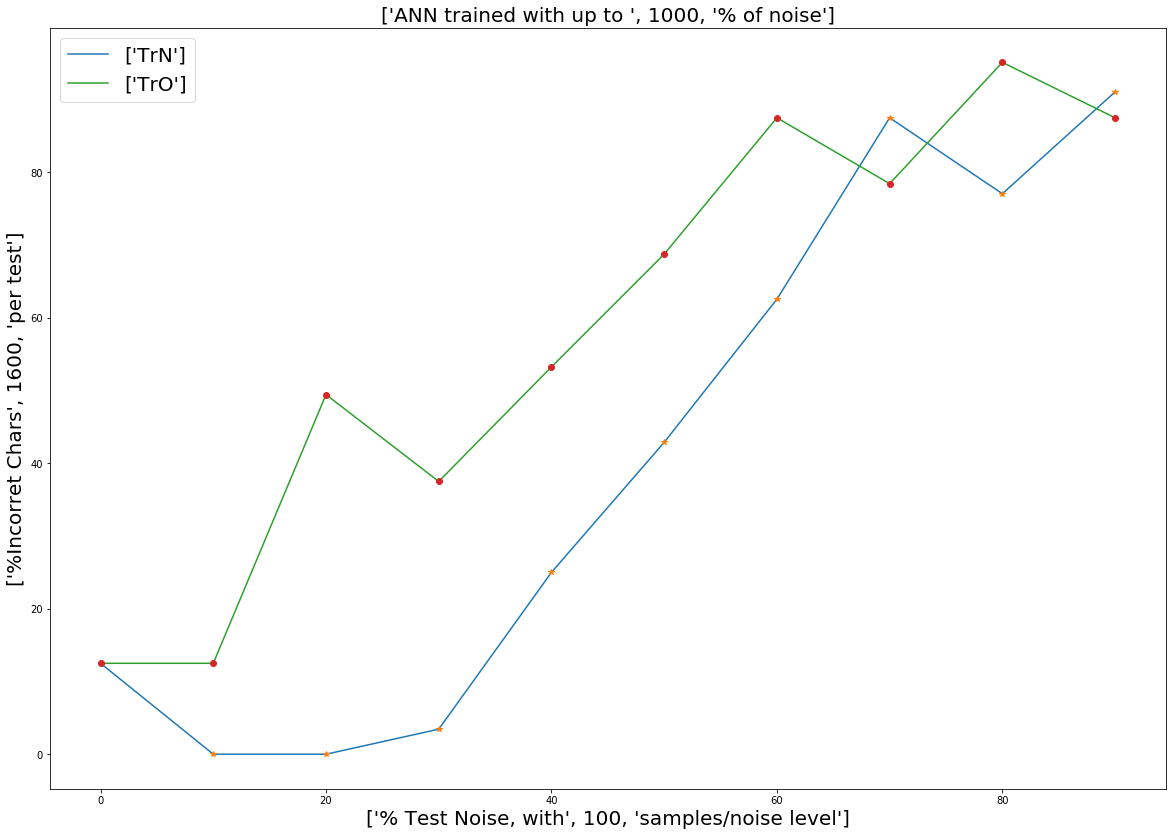

In [74]:
plt.figure(figsize=(20,14))
 
plt.plot(range(0,NStep*N,NStep),FitV, label=['TrN'])
plt.plot(range(0,NStep*N,NStep),FitV,'*')

plt.plot(range(0,NStep*N,NStep),FitO, label=['TrO'])
plt.plot(range(0,NStep*N,NStep),FitO,'o')

plt.title(['ANN trained with up to ' ,N*Nnv,'% of noise'], fontsize=20)
plt.ylabel(["%Incorret Chars",Nnv*16,'per test'], fontsize=20)
plt.xlabel(['% Test Noise, with',Nnv,'samples/noise level'], fontsize=20)
plt.legend(loc='upper left', fontsize=20)
 
plt.savefig('figANN_'+ varSaveFile +'.pdf')
plt.show()     